In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy import stats

def to_timestamp(d):
    return d.timestamp()

In [2]:
data = pd.read_csv('dog_rates_tweets.csv',parse_dates=[1])

In [3]:
data['rating'] = data['text'].str.extract(r'(\d+(\.\d+)?)/10', expand = False)[0]
#print(data)
data = data.dropna()
#print(data)

In [4]:
data['rating'] = data['rating'].astype(float)
data = data[data['rating'] <= 25]
#print(data)

In [5]:
data['timestamp'] = data['created_at'].apply(to_timestamp)
fit = stats.linregress(data['timestamp'],data['rating'])
#print (data)

In [6]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

In [7]:
fit.slope, fit.intercept

(3.515929974847721e-08, -40.46415480898916)

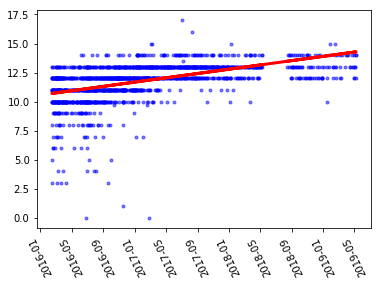

In [8]:
plt.xticks(rotation=115)
plt.plot(data['created_at'],data['rating'],'b.',alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()

In [9]:
p = fit.pvalue
print('P-value for dog rates is')
print(p)

P-value for dog rates is
1.5139606492959894e-106


In [10]:
residual = data['rating'] - data['prediction']
print(residual)

2       0.814237
7      -0.181785
8       0.820391
24     -0.167614
30     -0.163804
          ...   
7363    0.492662
7369    0.496144
7381   -0.498710
7431    0.517460
7433   -0.480725
Length: 1669, dtype: float64


(array([  3.,   0.,   8.,   5.,  20.,  60., 501., 914., 154.,   4.]),
 array([-11.85115447, -10.19011766,  -8.52908085,  -6.86804404,
         -5.20700723,  -3.54597043,  -1.88493362,  -0.22389681,
          1.43714   ,   3.09817681,   4.75921362]),
 <a list of 10 Patch objects>)

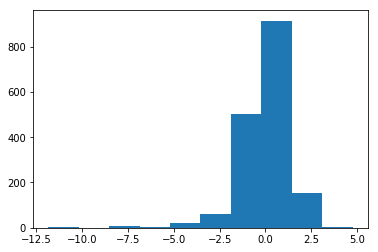

In [11]:
plt.hist(residual)